# Explore here

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.linear_model import LinearRegression

In [228]:
# Get Insurance data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

In [229]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [230]:
df.shape

(1338, 7)

In [231]:
df.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [233]:
# Start Exploratory data analysis (EDA)

# Count the number of unique values in total_df Dataframe
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

There are none variable with an unique value.

There are none irrelevant data to eliminate in the dataframe.

In [234]:
# Description of the numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


age (age of primary beneficiary): The minimum age is 18 years old and the maximum 64 years old with a mean of 39,2 years old.

bmi (body mass index): The minimum BMI is 15,9 and the maximum 53,13 with a mean of 30,66.

children (number of children/dependents covered by health insurance): The minimum number of children is 0 and the maximum 5 with a mean of 13.270,42.

charges (health insurance premium): The minimum insurance charge is 1121,87 and the maximum is 63.770,42 with a mean of 13.270,42 and a positive skew.

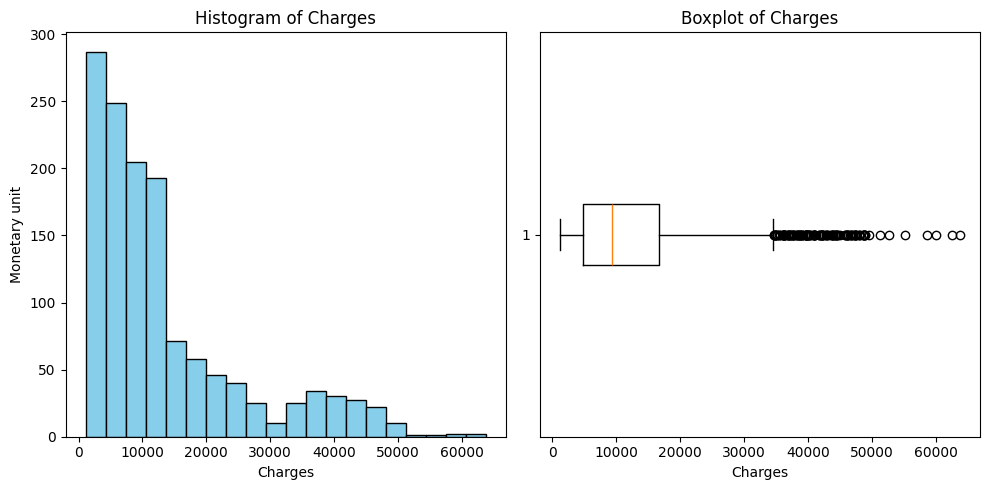

In [235]:
# Histogram and boxplot of the charges variable
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Histogram in the first subplot
ax[0].hist(df['charges'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Charges')
ax[0].set_xlabel('Charges')
ax[0].set_ylabel('Monetary unit')

# Boxplot in the second subplot
ax[1].boxplot(df['charges'], vert=False)
ax[1].set_title('Boxplot of Charges')
ax[1].set_xlabel('Charges')

# Show the graph
plt.tight_layout()
plt.show()


In [236]:
zero_values = (df['charges'] == 0).sum()
print(f"Number of zero values of 'charges' column is: {zero_values}")

Number of zero values of 'charges' column is: 0


There are no zero values in "charges" column.

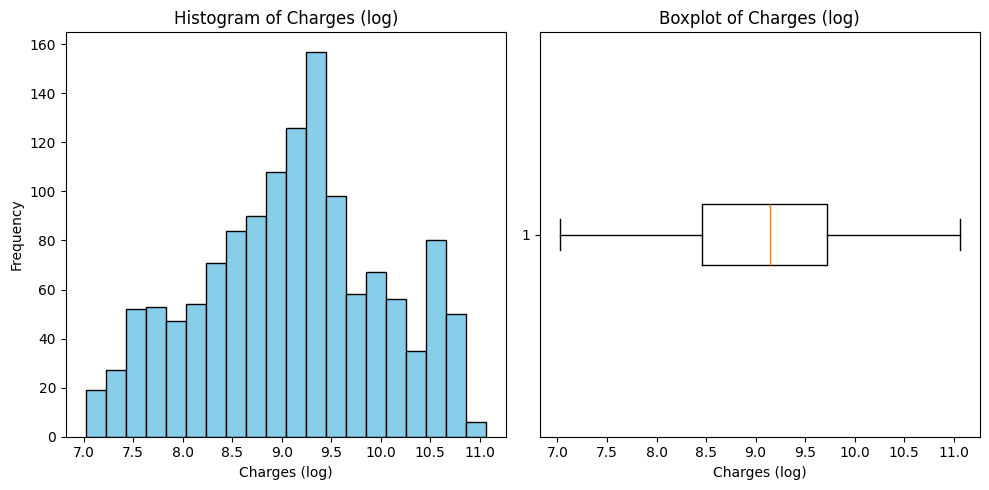

In [237]:
# Add a column to df with the log charges
df['log_charges'] = np.log(df['charges'])
# Histogram and boxplot of the log charges
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Histogram in the first subplot
ax[0].hist(df['log_charges'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Charges (log)')
ax[0].set_xlabel('Charges (log)')
ax[0].set_ylabel('Frequency')

# Boxplot in the second subplot
ax[1].boxplot(df['log_charges'], vert=False)
ax[1].set_title('Boxplot of Charges (log)')
ax[1].set_xlabel('Charges (log)')

# Show the graph
plt.tight_layout()
plt.show()


In [238]:
# Check the lines with at least one isnull value (%)
print(f"Lines with at least one isnull value in df: {df.isnull().any(axis=1).mean()*100:.2f} %")

Lines with at least one isnull value in df: 0.00 %


<Axes: >

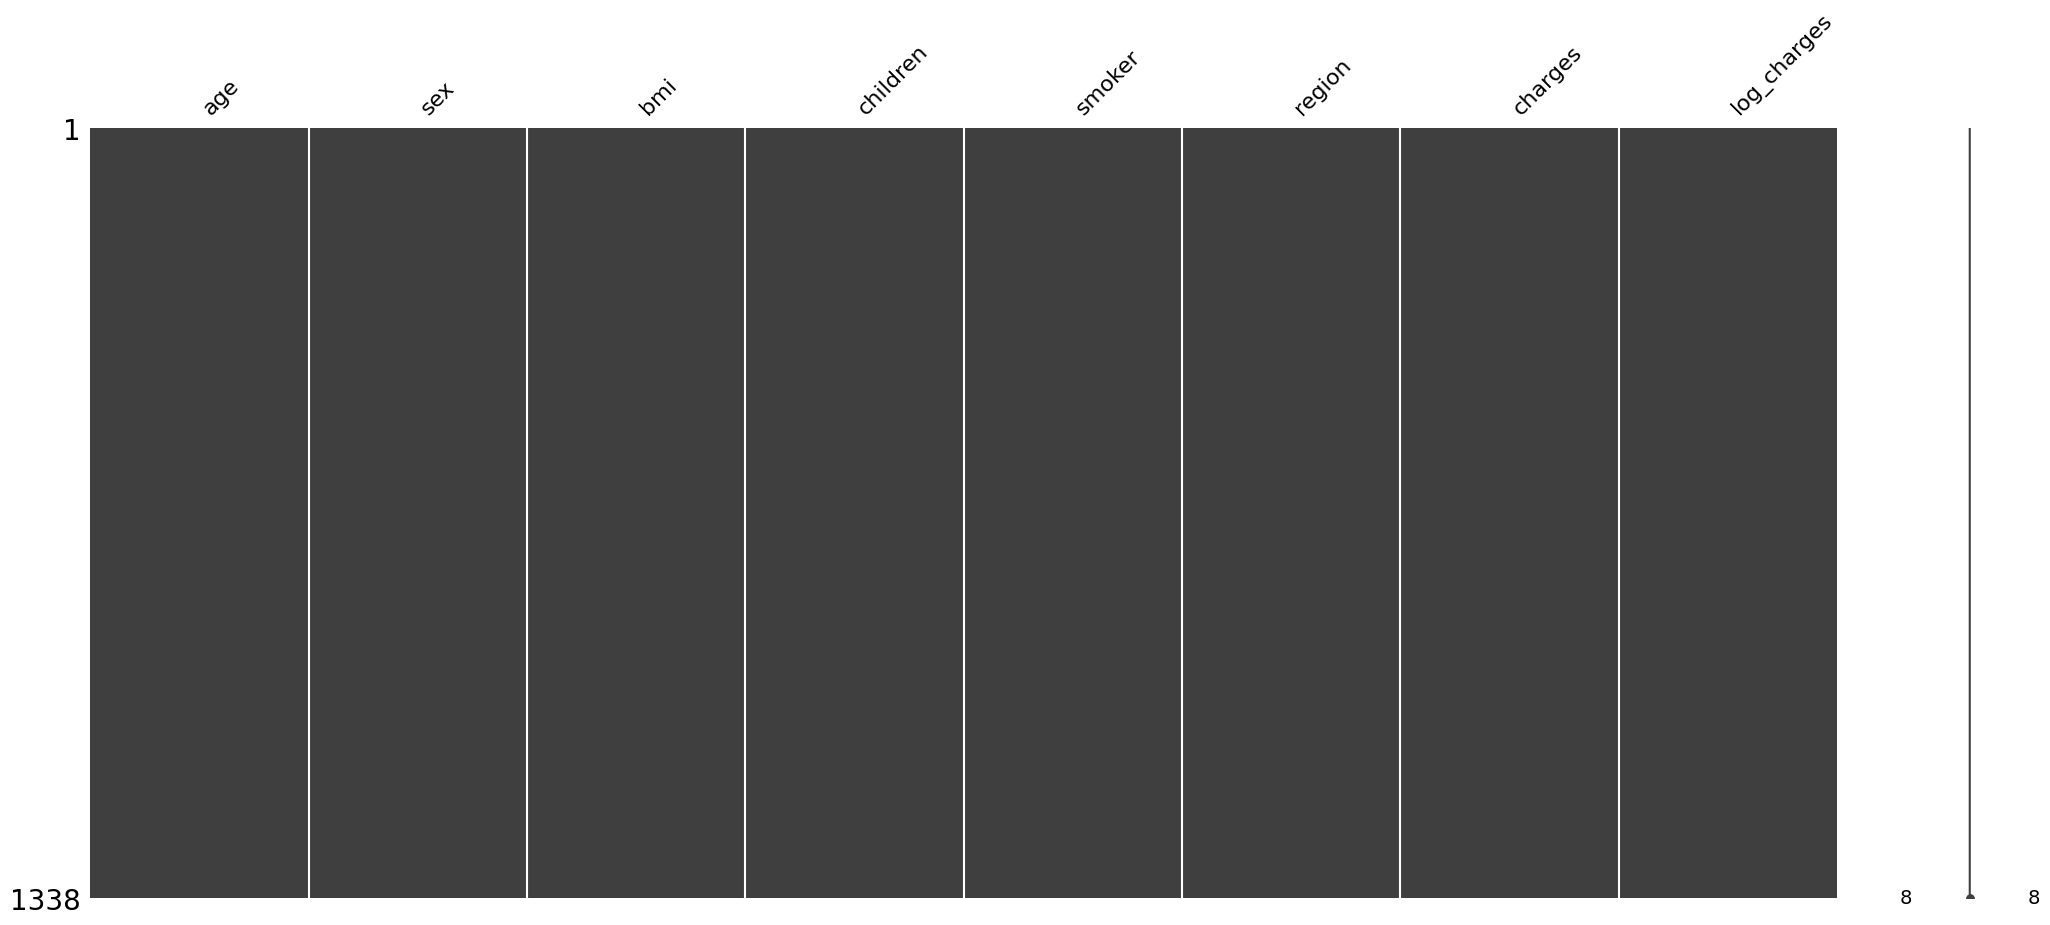

In [239]:
# Visualize missing values in dataframe 
msno.matrix(df)


<Axes: >

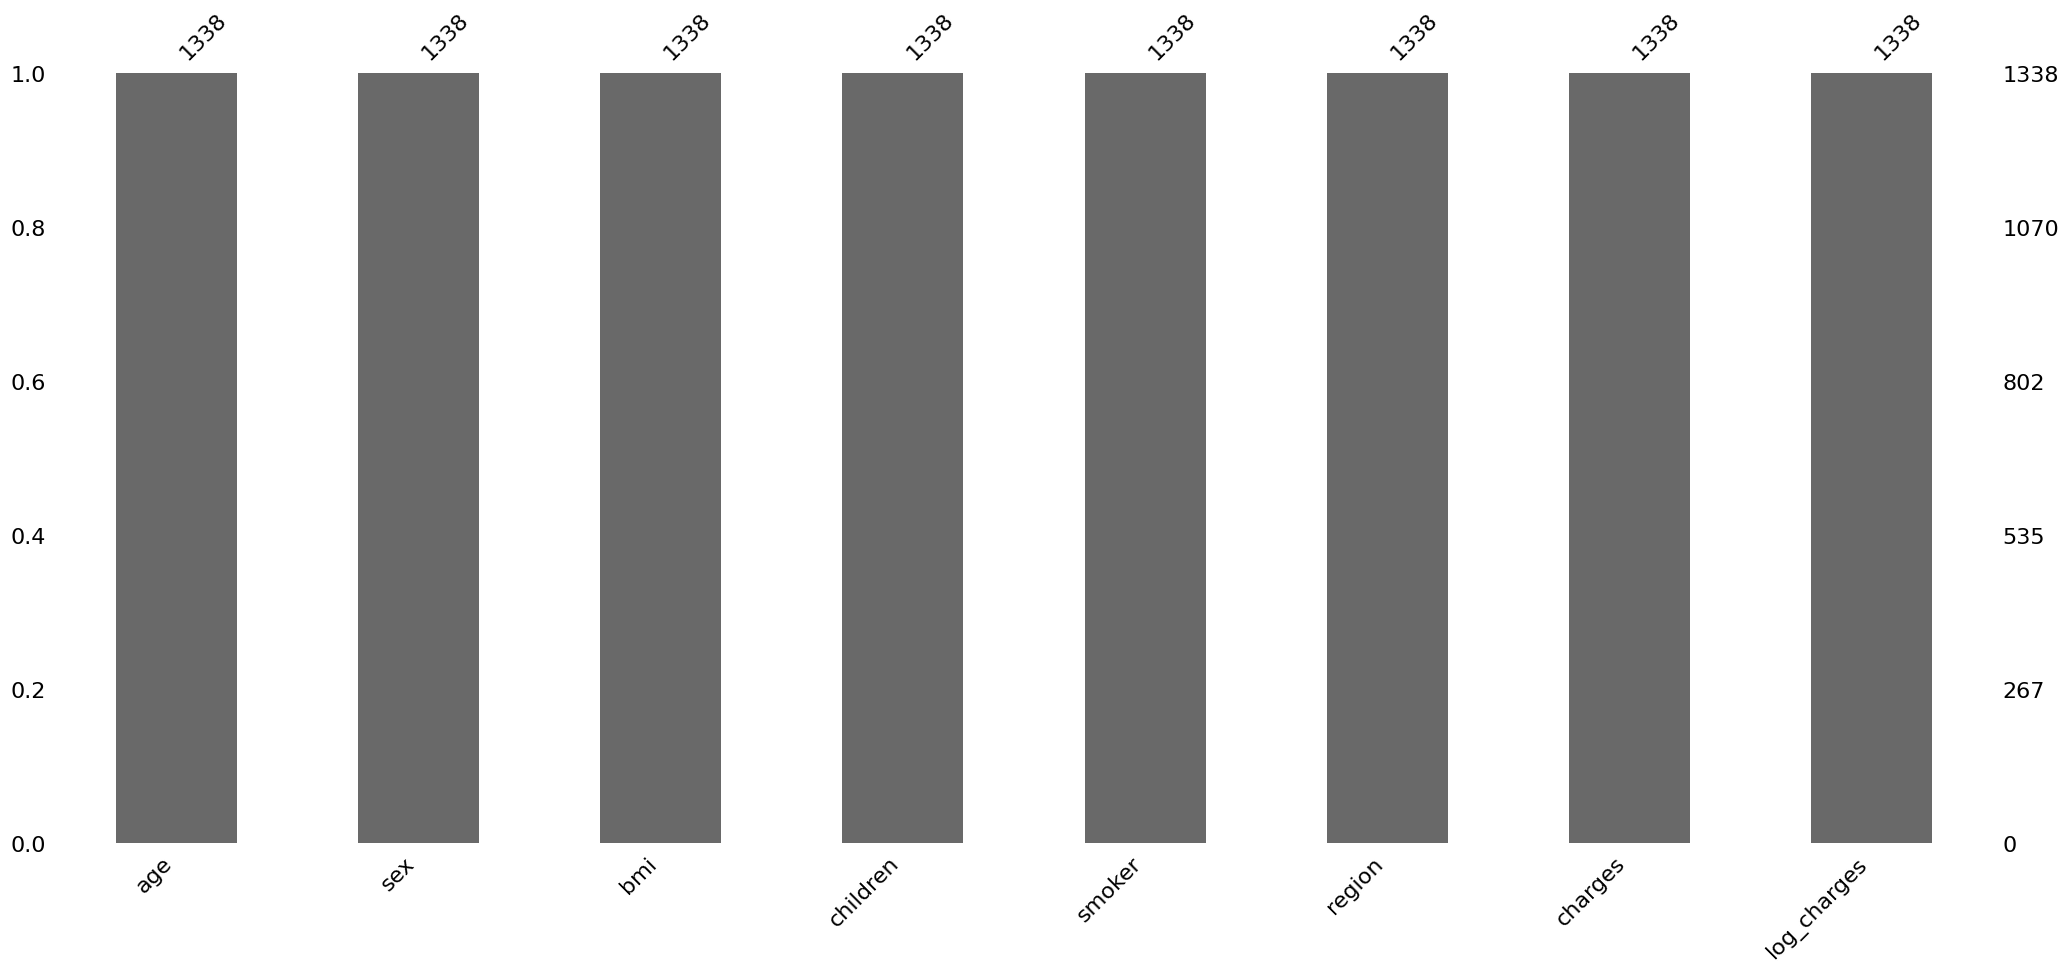

In [240]:
msno.bar(df)

There are no missing values in the dataframe.

In [241]:
# Change the categorical "sex" value to numeric
print(f"sex values: {df['sex'].unique()}")
# 2 values: female, male
# Change 'sex' column to numeric
df["sex"] = df["sex"].replace({ "female": 0, "male": 1 })

sex values: ['female' 'male']


/tmp/ipykernel_649/479730548.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({ "female": 0, "male": 1 })


In [242]:
print(f"sex values: {df['sex'].unique()}")

sex values: [0 1]


In [243]:
# Change the categorical "smoker" value to numeric
print(f"smoker values: {df['smoker'].unique()}")
# 2 values: yes, no
# Change 'smoker' column to numeric
df["smoker"] = df["smoker"].replace({ "yes": 1, "no": 0})


smoker values: ['yes' 'no']


/tmp/ipykernel_649/3139310785.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"] = df["smoker"].replace({ "yes": 1, "no": 0})


In [244]:
print(f"smoker values: {df['smoker'].unique()}")

smoker values: [1 0]


In [245]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,southwest,16884.92400,9.734176
1,18,1,33.770,1,0,southeast,1725.55230,7.453302
2,28,1,33.000,3,0,southeast,4449.46200,8.400538
3,33,1,22.705,0,0,northwest,21984.47061,9.998092
4,32,1,28.880,0,0,northwest,3866.85520,8.260197


In [246]:
print(f"region values: {df['region'].unique()}")
# 4 values: 'southwest', 'southeast', 'northwest', 'northeast'
# Change 'region' column to numeric
# Initialize the label encoder
label_encoder = LabelEncoder()
# Apply label encoding to the column
df['region'] = label_encoder.fit_transform(df['region'])


region values: ['southwest' 'southeast' 'northwest' 'northeast']


In [247]:
print(f"region values: {df['region'].unique()}")

region values: [3 2 1 0]


In [248]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197


'southwest': 3
'southeast:2
'northwest':1 
'northeast': 0

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   int64  
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   int64  
 5   region       1338 non-null   int64  
 6   charges      1338 non-null   float64
 7   log_charges  1338 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 83.8 KB


In [250]:
df.shape

(1338, 8)

In [251]:
# Calculate influence
# Split x and y variables
X = df.drop(['charges','log_charges'], axis=1)
y = df['log_charges']

# OLS regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(f"Columns names X: {X.columns.values}")
# Eliminate "const" column in the dataframe X
X = X.drop(columns=['const'])               
print("X: ")
X.head()


Columns names X: ['const' 'age' 'sex' 'bmi' 'children' 'smoker' 'region']
X: 


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


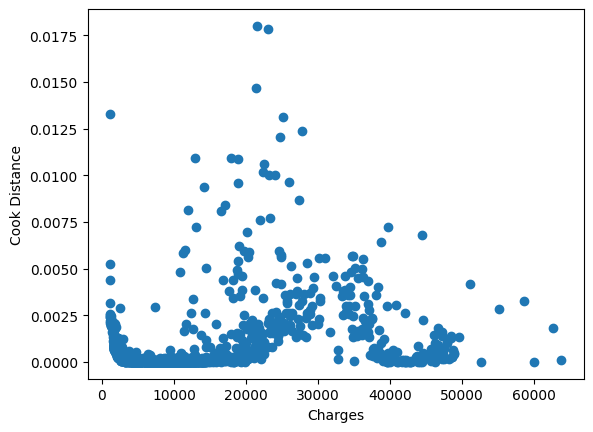

In [252]:
# Calculate the Cook distance
cooks_distance = model.get_influence().cooks_distance

# Scatter plot of the Cook distance vs charges
plt.scatter(df.charges, cooks_distance[0])
plt.xlabel('Charges')
plt.ylabel('Cook Distance')
plt.show()

In [253]:
# Cook distance threshold
t_point = 4/len(df)
print(f"t_point: {t_point}")
# Calculate any customers that exceed the 4/n threshold
print(f"Customers that exceed the 4/n threshold: {len(np.where(cooks_distance[0]>t_point)[0]):.2f}")
print(f"Customers that have a Cook distance higher than 0.005:\n")
print(np.where(cooks_distance[0]>0.005))
print(f"Customers that have a Cook distance higher than 0.0175:\n")
print(np.where(cooks_distance[0]>0.0175))

t_point: 0.0029895366218236174
Customers that exceed the 4/n threshold: 103.00
Customers that have a Cook distance higher than 0.005:

(array([   3,   92,  102,  103,  140,  219,  223,  242,  291,  301,  306,
        321,  340,  354,  355,  397,  430,  442,  468,  516,  525,  526,
        554,  637,  688,  754,  759,  803,  806, 1008, 1019, 1027, 1039,
       1047, 1080, 1085, 1104, 1123, 1134, 1156, 1157, 1189, 1195, 1215,
       1291, 1315, 1317, 1328]),)
Customers that have a Cook distance higher than 0.0175:

(array([ 430, 1027]),)


In [254]:
# Customer 430
df.iloc[430,]

age               19.00000
sex                1.00000
bmi               33.10000
children           0.00000
smoker             0.00000
region             3.00000
charges        23082.95533
log_charges       10.04685
Name: 430, dtype: float64

In [255]:
# Eliminate influences
df2=df.drop(np.where(cooks_distance[0]>t_point)[0])

In [256]:
stats = df2.describe(include="all")
print(stats)


               age          sex          bmi     children       smoker  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mean     39.809717     0.502834    30.603972     1.109312     0.187045   
std      13.778824     0.500195     6.044991     1.205149     0.390105   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      28.000000     0.000000    26.220000     0.000000     0.000000   
50%      40.000000     1.000000    30.360000     1.000000     0.000000   
75%      51.000000     1.000000    34.580000     2.000000     0.000000   
max      64.000000     1.000000    50.380000     5.000000     1.000000   

            region       charges  log_charges  
count  1235.000000   1235.000000  1235.000000  
mean      1.523077  12235.894526     9.022288  
std       1.103293  11691.369455     0.895021  
min       0.000000   1121.873900     7.022756  
25%       1.000000   4502.500825     8.412388  
50%       2.000000   8604.483650     9.060039

sex (gender of the primary beneficiary): the dataset includes more men than women.

smoker: the number of smokers in this dataset is low.

In [257]:
print(df2["sex"].value_counts())

sex
1    621
0    614
Name: count, dtype: int64


In [258]:
print(df2["smoker"].value_counts())

smoker
0    1004
1     231
Name: count, dtype: int64


In [259]:
print(df2["region"].value_counts())

region
2    334
1    304
3    303
0    294
Name: count, dtype: int64


In [260]:
# Feature importance
# Train/test split
X = df2.drop(['charges','log_charges'], axis=1)
y = df2['log_charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature importance using xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
4,smoker,90.636223
0,age,7.035043
3,children,0.970976
2,bmi,0.641469
1,sex,0.386476
5,region,0.329809


In [261]:
X_train

,age,sex,bmi,children,smoker,region
934,32,1,37.180,2,0,2
785,35,0,27.700,3,0,3
864,51,1,25.400,0,0,3
698,56,1,33.725,0,0,1
875,23,0,28.120,0,0,1
...,...,...,...,...,...,...
1126,55,1,29.900,0,0,3
1183,48,0,27.360,1,0,0
1223,20,0,24.420,0,1,2
925,50,1,32.110,2,0,0


In [262]:
y_train

934      8.449640
785      8.766266
864      9.080513
698      9.303489
875      7.897339
          ...    
1126     9.231577
1183     9.153493
1223    10.170674
925     10.139876
1219     8.927601
Name: log_charges, Length: 988, dtype: float64

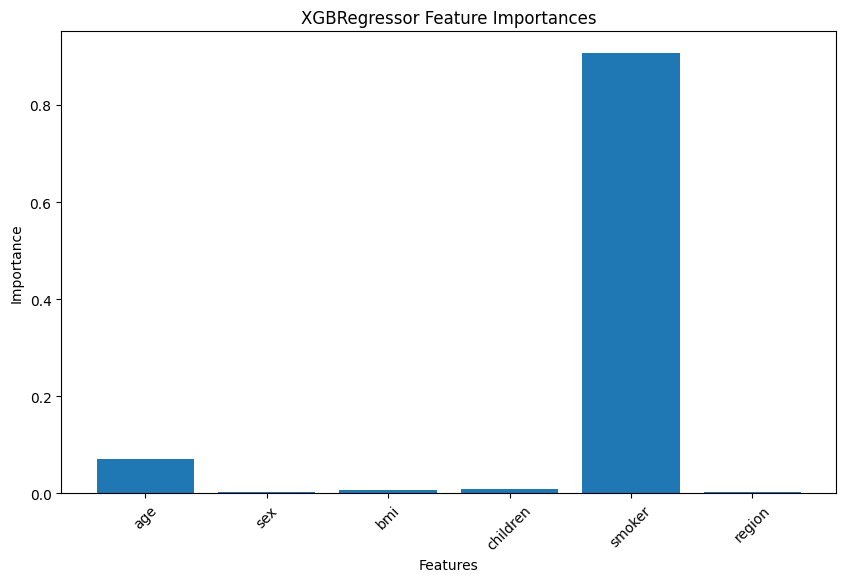

In [263]:
# Extract feature importances
importances = xgb_model.feature_importances_
feature_names=X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), feature_names, rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("XGBRegressor Feature Importances")
plt.show()


In [264]:
# Select the features with more than 1% of importance
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values]
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values]

After dropping the features with an Importance <1, X_train and X_test have 2 columns: smoker and age.

In [265]:
X_train

,smoker,age
934,0,32
785,0,35
864,0,51
698,0,56
875,0,23
...,...,...
1126,0,55
1183,0,48
1223,1,20
925,0,50


In [266]:
X_test

,smoker,age
812,0,54
633,0,40
596,0,42
124,0,47
188,0,41
...,...,...
36,0,62
837,0,56
977,0,26
392,0,48


In [267]:
# VIF
X_train.corr()

vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

smoker    1.000006
age       1.000006
dtype: float64

<Axes: >

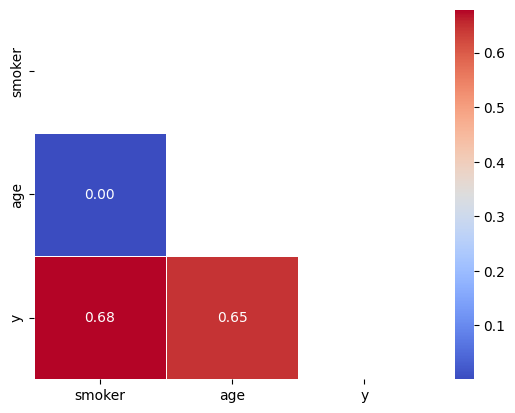

In [268]:
# Heatmap of correlation
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')


As VIF<10 and "smoker" and "age" don't have a high correlation, none additional feature is dropped.

In [269]:
# Scaling of the independent variables
# Identify the binary variables
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index(['smoker'], dtype='object')

In [270]:
# Select the non-binary columns (the age column)
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)
# Features scaling
# Scaling of the train values
scaler = MinMaxScaler().fit(X_train_num)
# Transformation with the calculated scaler
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)
X_train_sc


,age,smoker
0,0.304348,0
1,0.369565,0
2,0.717391,0
3,0.826087,0
4,0.108696,0
...,...,...
983,0.804348,0
984,0.652174,0
985,0.043478,1
986,0.695652,0


"smoker" is the variable with higher importance and with higher correlation with the target variable.

In [271]:
X_train_sc['smoker']

0      0
1      0
2      0
3      0
4      0
      ..
983    0
984    0
985    1
986    0
987    0
Name: smoker, Length: 988, dtype: int64

In [272]:
print(type(X_train_sc['smoker']))   

<class 'pandas.core.series.Series'>


In [273]:
# Reset the indexes in y_train
y_train=y_train.reset_index(drop=True)
y_train 

0       8.449640
1       8.766266
2       9.080513
3       9.303489
4       7.897339
         ...    
983     9.231577
984     9.153493
985    10.170674
986    10.139876
987     8.927601
Name: log_charges, Length: 988, dtype: float64

In [274]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [275]:
# Create a dataframe with "smoker" and "log_charges"
data = pd.DataFrame({'Smoker': X_train_sc['smoker'], 'Charges': y_train})
data


,Smoker,Charges
0,0,8.449640
1,0,8.766266
2,0,9.080513
3,0,9.303489
4,0,7.897339
...,...,...
983,0,9.231577
984,0,9.153493
985,1,10.170674
986,0,10.139876


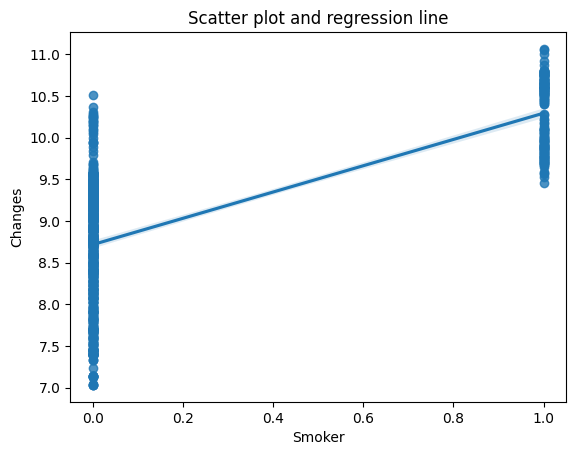

In [276]:
# Scatter plot and regression line with "smoker" and "charges" values
sns.regplot(x="Smoker", y="Charges", data=data)
plt.title("Scatter plot and regression line")
plt.xlabel("Smoker")
plt.ylabel("Changes")
plt.show()

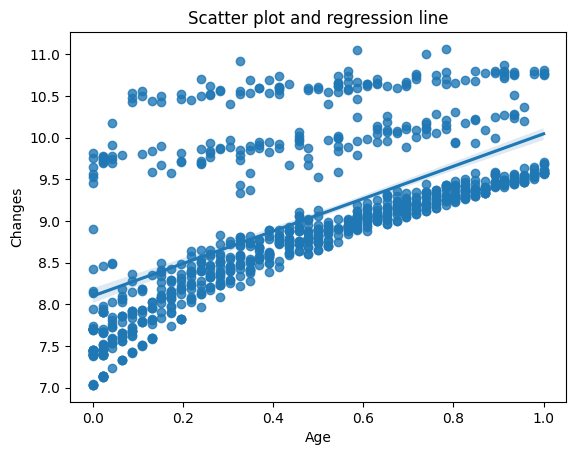

In [277]:
# Linear regression model with the "age" variable
# Create a dataframe with "age" and "log_charges"
data2 = pd.DataFrame({'Age': X_train_sc['age'], 'Charges': y_train})
# Scatter plot and regression line
sns.regplot(x="Age", y="Charges", data=data2)
plt.title("Scatter plot and regression line")
plt.xlabel("Age")
plt.ylabel("Changes")
plt.show()

In [278]:
# Create the simple lineal regression model with "age" values
X= data2["Age"]
y= data2["Charges"]
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model to the data
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Charges   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     708.6
Date:                Mon, 20 Jan 2025   Prob (F-statistic):          4.44e-118
Time:                        15:00:31   Log-Likelihood:                -1035.4
No. Observations:                 988   AIC:                             2075.
Df Residuals:                     986   BIC:                             2085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0978      0.041    199.141      0.0

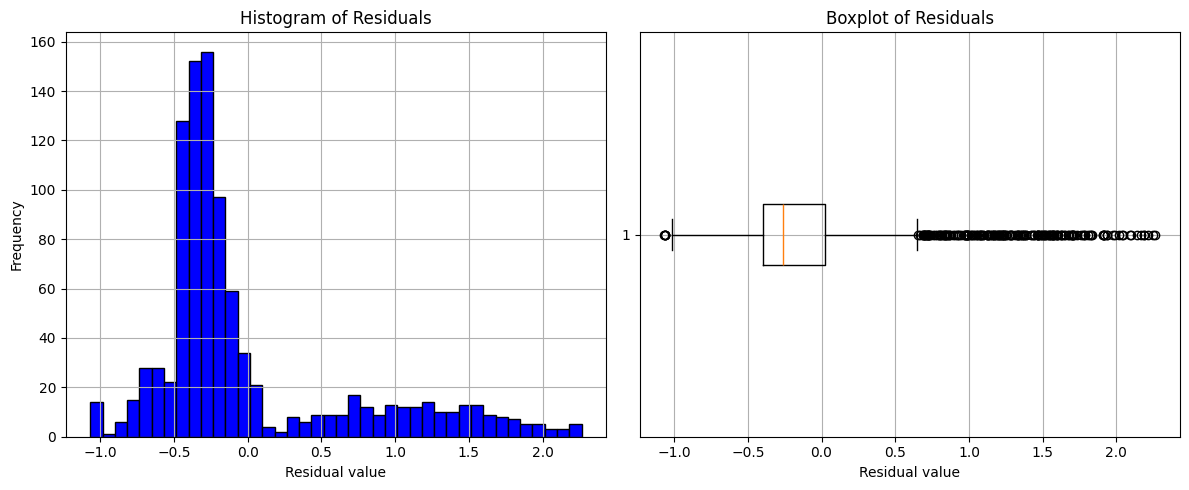

In [279]:
residuals = results.resid

# Histogram and boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of Residuals
ax1.hist(residuals, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histogram of Residuals')
ax1.set_xlabel('Residual value')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Boxplot of Residuals
ax2.boxplot(residuals, vert=False)
ax2.set_title('Boxplot of Residuals')
ax2.set_xlabel('Residual value')
ax2.grid(True)

plt.tight_layout()  # Fit the margins to avoid overlapping
plt.show()

Evaluation of the simple OLS model with "age":
- R-squared: 41,8%
- Prob (F-statistic): 4.44e-118
- Kurtosis: 4.17
- Skew: 1.45

The R squared is less than 60% but the Prob (F-statistic) is close to zero, this Linear Regression model is valid with a poor fit.

In [280]:
# Multiple statsmodel OLS linear Regression model with "smoker" and "age"
# Create the OLS model
# Add a constant to the independent variables
X = sm.add_constant(X_train_sc)

# Fit the OLS model
model = sm.OLS(y_train, X).fit()

# View the summary of the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     3538.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:00:32   Log-Likelihood:                -264.52
No. Observations:                 988   AIC:                             535.0
Df Residuals:                     985   BIC:                             549.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8056      0.019    405.429      0.0

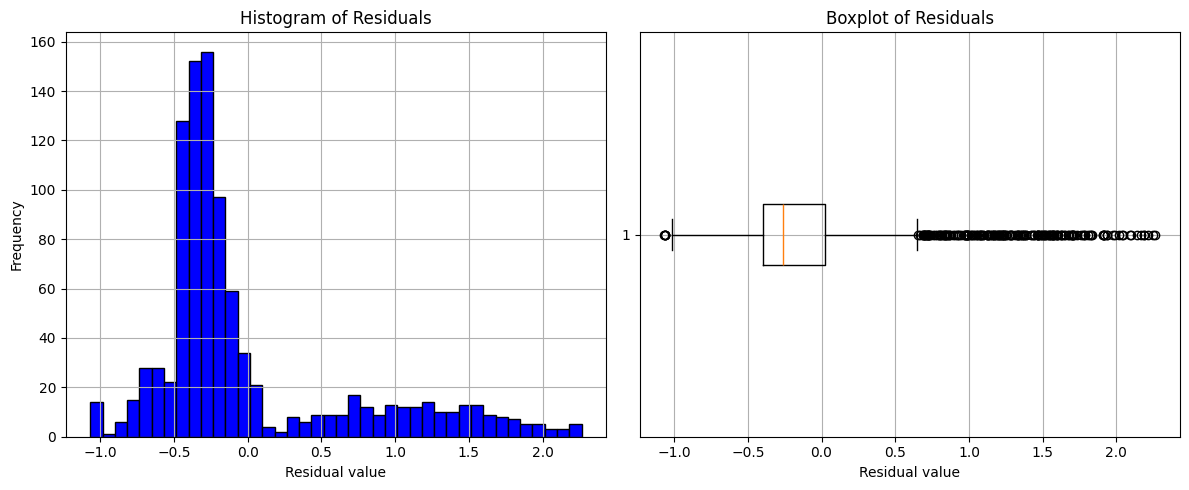

In [281]:
residuals2 = results.resid

# Histogram and boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of Residuals
ax1.hist(residuals2, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histogram of Residuals')
ax1.set_xlabel('Residual value')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Boxplot of Residuals
ax2.boxplot(residuals2, vert=False)
ax2.set_title('Boxplot of Residuals')
ax2.set_xlabel('Residual value')
ax2.grid(True)

plt.tight_layout()  # Fit the margins to avoid overlapping
plt.show()

Evaluation of the multiple OLS model with "smoker" and "age":
- R-squared: 87,8%
- Prob (F-statistic): 0.00
- Kurtosis: 5.19
- Skew: 0.64

The R squared is high with a value of 87,8% and the Prob (F-statistic) is nearly zero, this Linear Regression model is valid.

In [282]:
# Multiple scikit Linear Regression model with "smoker" and "age"
model = LinearRegression().fit(X_train_sc, y_train)
ypred_train = model.predict(X_train_sc)
ypred_test = model.predict(X_test_sc)

In [283]:
# Evaluation of the model
# R squared
r_sq = model.score(X_train_sc, y_train)
print(f"Coefficient of determination: {r_sq*100:.2f}%")

Coefficient of determination: 87.78%


The Multiple scikit Linear Regression model with "smoker" and "age" is valid as the R squared is high with a value of 87,78%.